In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [52]:
df = pd.read_excel("./dataset/premiums_young_with_gr.xlsx")
df.sample(5)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,Genetical_Risk
4915,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Salaried,25L - 40L,25,No Disease,Bronze,4329,0
19355,25,Female,Northeast,Unmarried,1,Normal,No Smoking,Freelancer,> 40L,83,No Disease,Silver,12140,5
13863,20,Male,Northeast,Unmarried,0,Underweight,Regular,Salaried,25L - 40L,32,No Disease,Bronze,8535,4
19939,19,Female,Southeast,Unmarried,0,Underweight,No Smoking,Self-Employed,25L - 40L,39,No Disease,Bronze,8203,4
13080,21,Female,Northwest,Unmarried,1,Normal,No Smoking,Freelancer,> 40L,85,No Disease,Gold,14588,4


### EDA1

In [53]:
df.shape

(20096, 14)

In [54]:
df.columns

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount', 'Genetical_Risk'],
      dtype='object')

In [55]:
df.columns = df.columns.str.replace(" ", "_").str.lower()
df.sample(5)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
13329,23,Male,Southeast,Married,2,Normal,Regular,Freelancer,10L - 25L,21,No Disease,Bronze,8669,4
5943,20,Female,Southeast,Unmarried,0,Normal,No Smoking,Salaried,<10L,1,Thyroid,Bronze,4706,0
3940,20,Male,Northwest,Unmarried,1,Normal,No Smoking,Freelancer,25L - 40L,30,No Disease,Bronze,7388,3
14935,19,Male,Northwest,Unmarried,0,Normal,Occasional,Self-Employed,25L - 40L,40,No Disease,Bronze,7251,3
15365,25,Female,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,24,No Disease,Bronze,4255,0


In [56]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           2
employment_status        1
income_level             4
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [57]:
df = df.dropna()

In [58]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [59]:
df.shape

(20090, 14)

In [60]:
df.duplicated().sum()

0

In [61]:
df = df.drop_duplicates()

In [62]:
df.shape

(20090, 14)

In [63]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.718019,22.510851,8142.096267,2.503932
std,2.294052,0.940713,23.420493,2749.906347,1.710203
min,18.000000,-3.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


In [64]:
df[df["number_of_dependants"] < 0]["number_of_dependants"].unique()

array([-3, -1], dtype=int64)

In [65]:
df["number_of_dependants"] = abs(df["number_of_dependants"])
df["number_of_dependants"].describe()

count    20090.000000
mean         0.722598
std          0.937200
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: number_of_dependants, dtype: float64

In [66]:
numeric_columns = df.select_dtypes(["float64", "int64"]).columns
numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

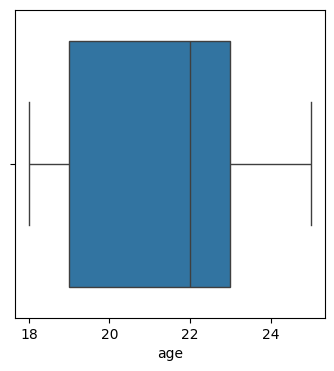

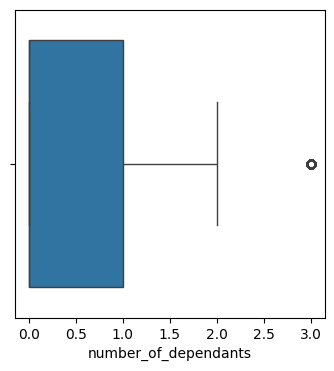

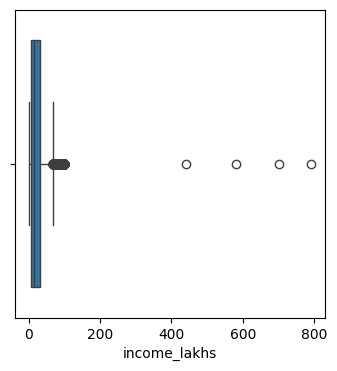

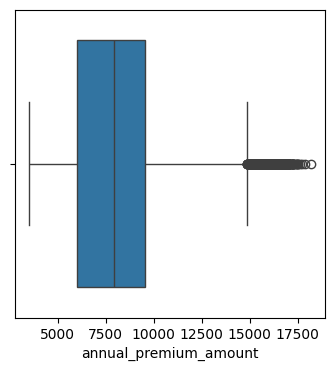

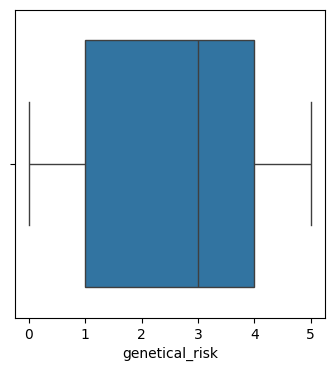

In [67]:
for col in numeric_columns:
    plt.figure(figsize=(4,4))
    sns.boxplot(x = df[col])
    plt.show()

In [68]:
df[df["age"] > 100]["age"].unique()

array([], dtype=int64)

In [69]:
df1 = df[df["age"] <= 100].copy()

In [70]:
df1.shape

(20090, 14)

In [71]:
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.722598,22.510851,8142.096267,2.503932
std,2.294052,0.937200,23.420493,2749.906347,1.710203
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


In [72]:
def get_iqr_bounds(col):
    Q1, Q3 =  col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

In [73]:
get_iqr_bounds(df1["income_lakhs"])

(-31.5, 68.5)

In [74]:
quantile_threold = df1["income_lakhs"].quantile(0.999)
quantile_threold

100.0

In [75]:
df2 = df1[df1["income_lakhs"] <= quantile_threold].copy()
df2.shape

(20086, 14)

In [76]:
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,21.494474,0.722742,22.390371,8141.799263,2.503883
std,2.294248,0.937238,21.732062,2749.912486,1.710184
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.000000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,100.000000,18186.000000,5.000000


### EDA 2

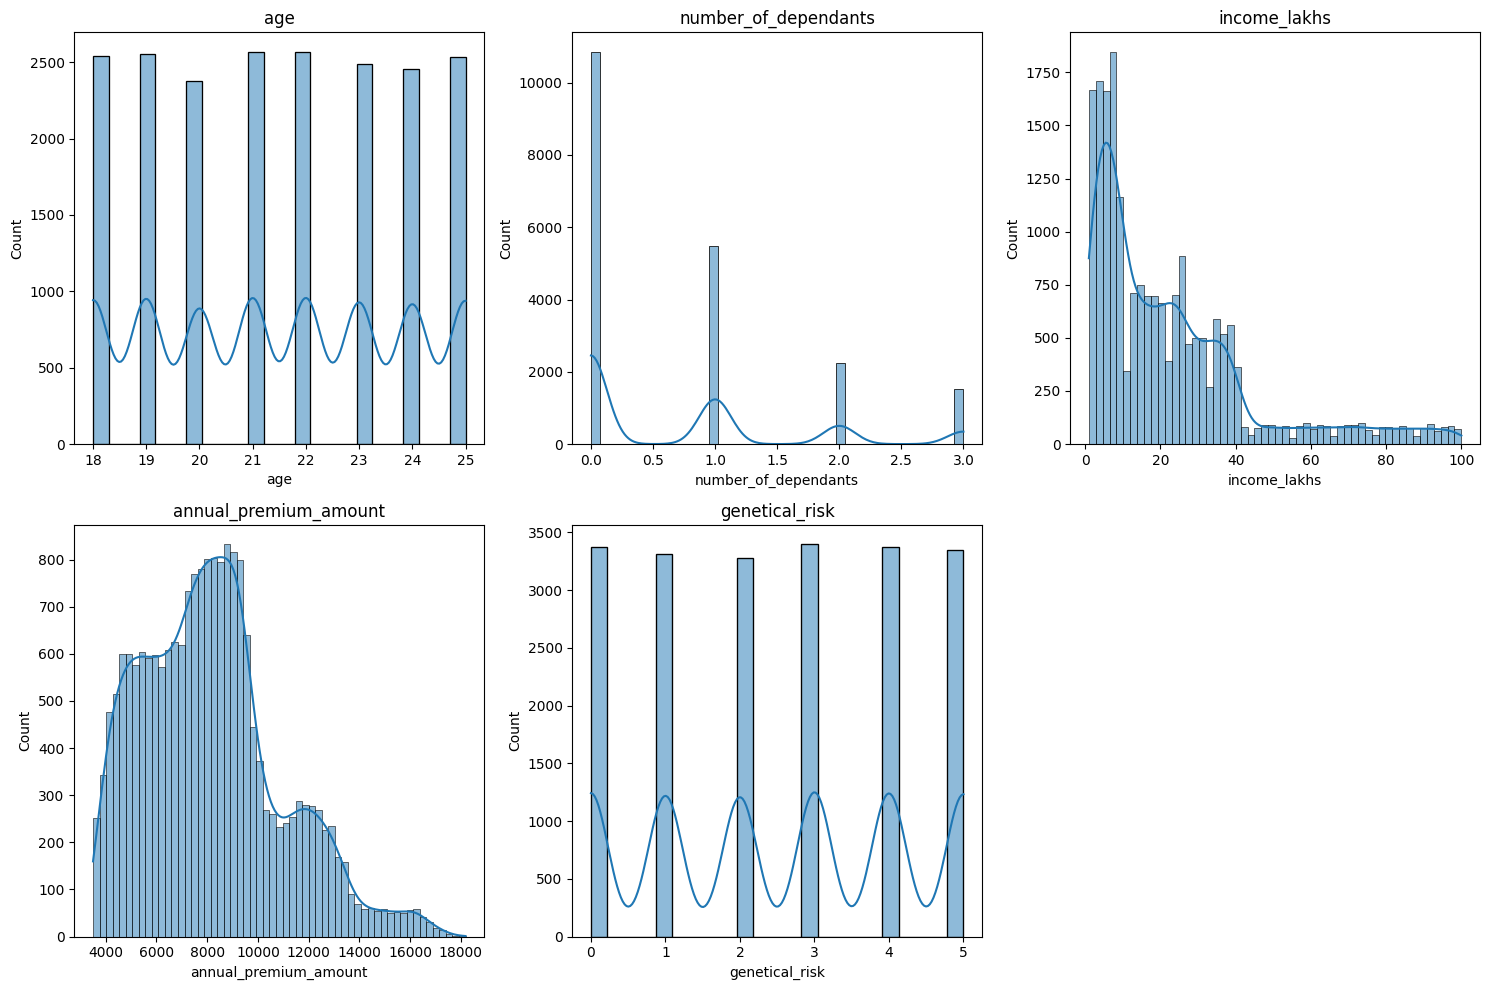

In [77]:
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize= (15, 10)) 


for i, col in enumerate(numeric_columns):
    ax = axs[i//3, i%3]
    sns.histplot(df2[col], kde=True, ax = ax)
    ax.set_title(col)

if len(numeric_columns) % 3 != 0:
    for j in range(len(numeric_columns), 6):
        axs.flat[j].set_visible(False)

plt.tight_layout()
plt.show()

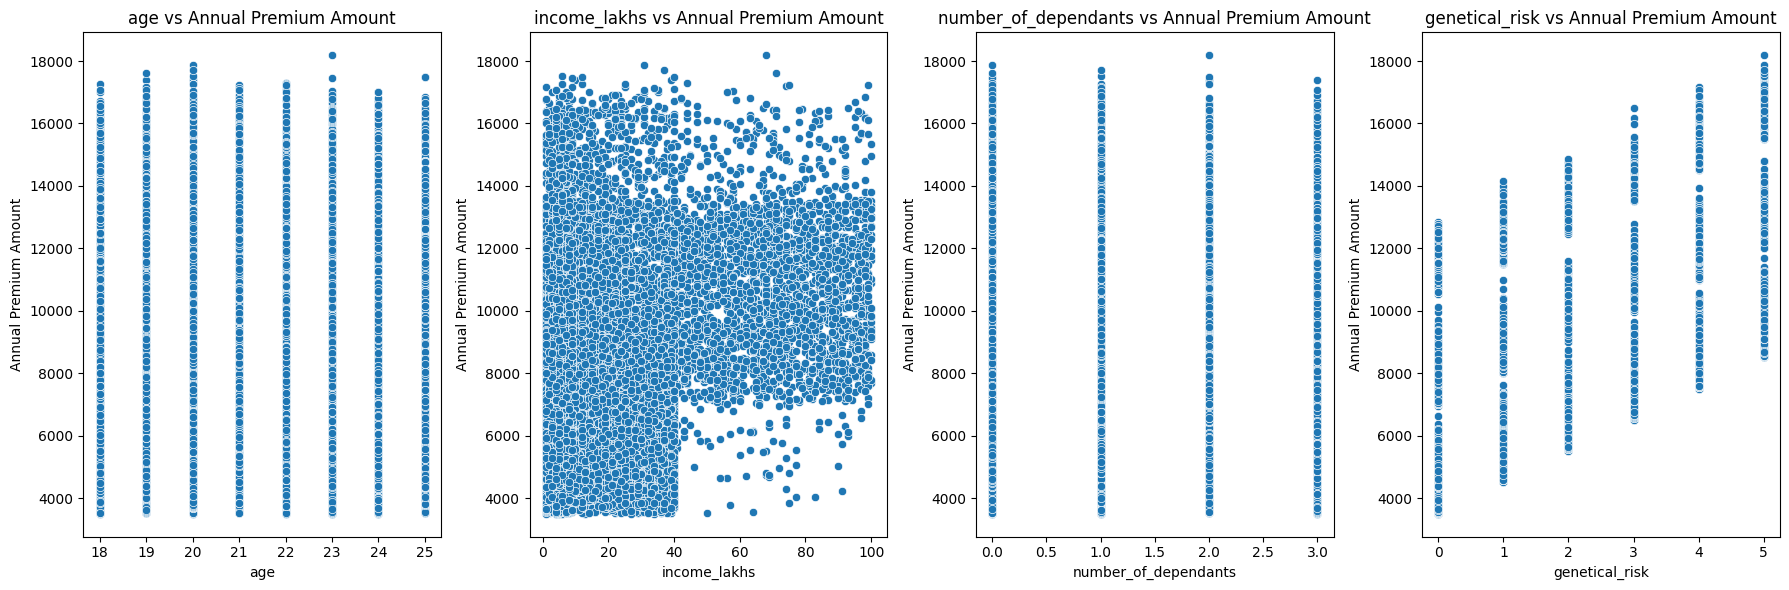

In [78]:
numeric_features = ["age", "income_lakhs", "number_of_dependants", "genetical_risk"]

fig, axes = plt.subplots(1, len(numeric_features), figsize= (18, 6))

for ax, col in zip(axes, numeric_features):
    sns.scatterplot(x = df2[col], y=df2["annual_premium_amount"], ax = ax)
    ax.set_title(f"{col} vs Annual Premium Amount")
    ax.set_xlabel(col)
    ax.set_ylabel("Annual Premium Amount")

plt.tight_layout()
plt.show()

In [79]:
categorical_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status', 'income_level', 'medical_history', 'insurance_plan']
for col in categorical_cols:
    print(col, ":", df2[col].unique())

gender : ['Male' 'Female']
region : ['Northeast' 'Northwest' 'Southeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Overweight' 'Underweight' 'Normal' 'Obesity']
smoking_status : ['Regular' 'No Smoking' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status : ['Self-Employed' 'Freelancer' 'Salaried']
income_level : ['> 40L' '<10L' '10L - 25L' '25L - 40L']
medical_history : ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'Thyroid' 'High blood pressure & Heart disease']
insurance_plan : ['Silver' 'Bronze' 'Gold']


In [80]:
df2['smoking_status'] = df2['smoking_status'].replace({
    'Not Smoking': 'No Smoking',
    'Does Not Smoke': 'No Smoking',
    'Smoking=0': 'No Smoking'
})

df2['smoking_status'].unique()

array(['Regular', 'No Smoking', 'Occasional'], dtype=object)

In [81]:
df2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3


In [82]:
pct_count = df2['gender'].value_counts(normalize=True)*100
pct_count

gender
Male      55.038335
Female    44.961665
Name: proportion, dtype: float64

<Axes: xlabel='gender'>

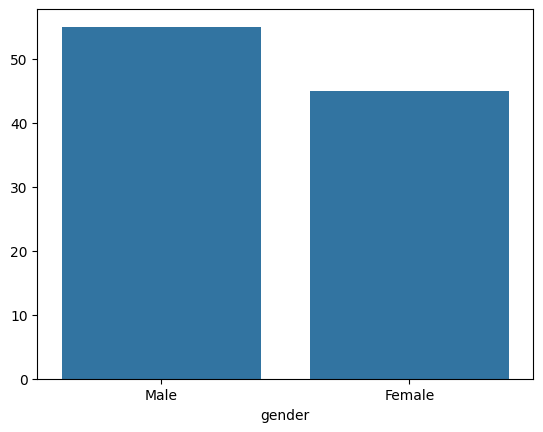

In [83]:
sns.barplot(x=pct_count.index, y=pct_count.values)

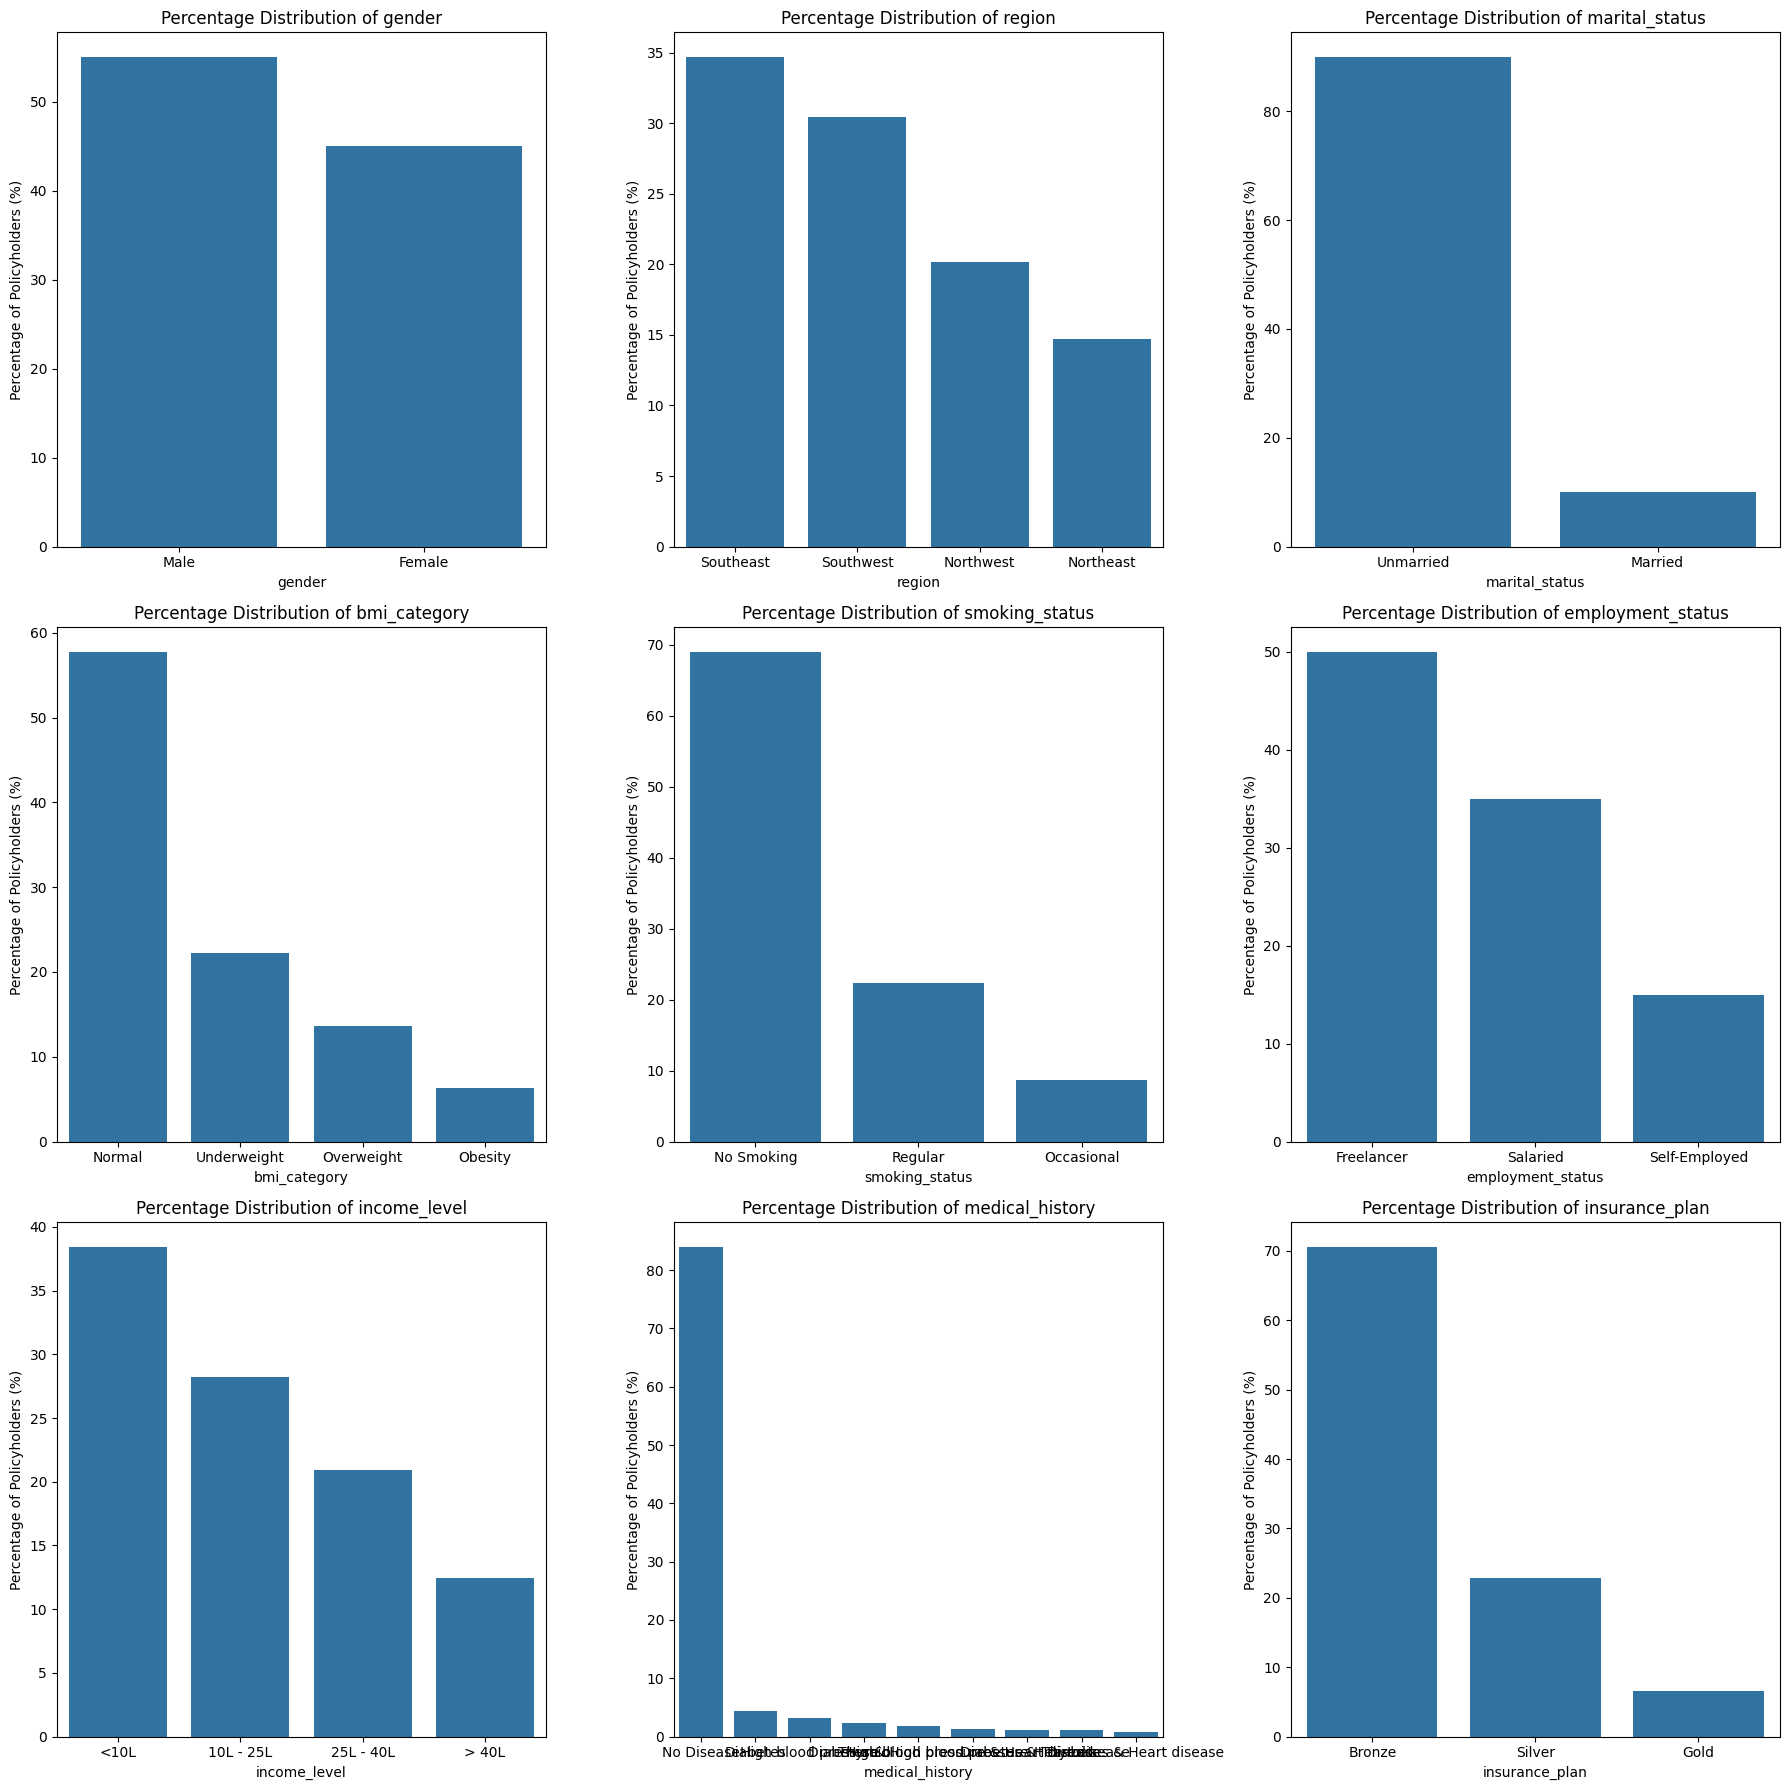

In [84]:
fig, axes = plt.subplots(3, 3, figsize=(18, 18))  # Adjust figure size as necessary
axes = axes.flatten()  # Flatten the 2D array of axes into 1D for easier iteration

for ax, column in zip(axes, categorical_cols):
    # Calculate the percentage distribution of each category
    category_counts = df2[column].value_counts(normalize=True) * 100  # normalize=True gives the relative frequencies
    
    # Plotting the distribution using barplot
    sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax)
    ax.set_title(f'Percentage Distribution of {column}')
    ax.set_ylabel('Percentage of Policyholders (%)')
    ax.set_xlabel(column)  # Set xlabel to the column name for clarity

plt.tight_layout()  # Adjusts plot parameters for better fit in the figure window
plt.show()

insurance_plan  Bronze  Gold  Silver
income_level                        
10L - 25L         4508   326     828
25L - 40L         3382   209     608
<10L              6172   404    1145
> 40L              115   366    2023


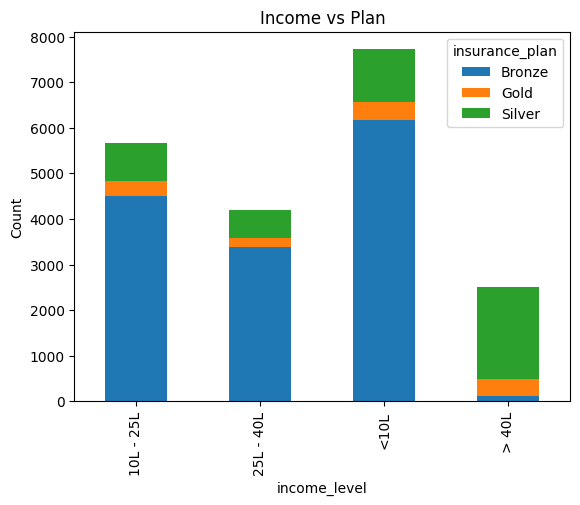

In [85]:
# Cross-tabulation of gender and smoking status
crosstab = pd.crosstab(df2['income_level'], df2['insurance_plan'])
print(crosstab)

# Plotting the crosstab
crosstab.plot(kind='bar', stacked=True)
plt.title('Income vs Plan')
plt.ylabel('Count')
plt.show()

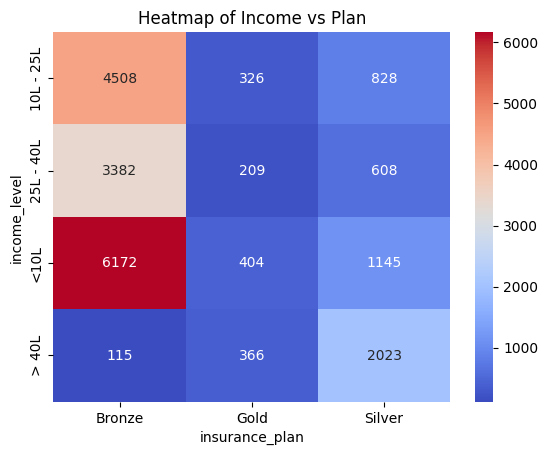

In [86]:
sns.heatmap(crosstab, annot=True, cmap='coolwarm',fmt="d")
plt.title('Heatmap of Income vs Plan')
plt.show()

### Feature Engineering

In [87]:
df2.sample(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
15462,20,Female,Southeast,Unmarried,0,Normal,No Smoking,Salaried,<10L,2,No Disease,Silver,8233,1
16293,20,Female,Southwest,Unmarried,2,Overweight,Regular,Salaried,<10L,9,No Disease,Bronze,8102,3


In [88]:
df2["medical_history"].unique()

array(['High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Diabetes & Heart disease',
       'Diabetes', 'Diabetes & Thyroid', 'Heart disease', 'Thyroid',
       'High blood pressure & Heart disease'], dtype=object)

In [89]:
risk_score = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure": 6,
    "thyroid": 5,
    "no disease": 0,
    "none": 0
}

In [90]:
df2[["disease1", "disease2"]] = df2["medical_history"].str.split(" & ", expand=True).apply(lambda x: x.str.lower())
df2.sample(5)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2
6731,25,Female,Southwest,Unmarried,0,Underweight,Regular,Freelancer,25L - 40L,26,No Disease,Bronze,10194,5,no disease,None
8840,22,Male,Northwest,Married,3,Underweight,No Smoking,Freelancer,10L - 25L,25,Diabetes,Bronze,9221,5,diabetes,None
3625,21,Male,Southeast,Unmarried,0,Obesity,No Smoking,Salaried,10L - 25L,13,No Disease,Bronze,6759,2,no disease,None
872,20,Female,Southwest,Unmarried,2,Normal,No Smoking,Self-Employed,25L - 40L,27,High blood pressure,Bronze,5497,1,high blood pressure,None
3825,21,Female,Southeast,Unmarried,1,Normal,No Smoking,Freelancer,10L - 25L,22,Diabetes & High blood pressure,Bronze,7647,3,diabetes,high blood pressure


In [91]:
df2["disease1"] = df2["disease1"].fillna("none")
df2["disease2"] = df2["disease2"].fillna("none")
df2["total_risk_score"] = 0

for disease in ["disease1", "disease2"]:
    df2["total_risk_score"] += df2[disease].map(risk_score)

max_score = df2["total_risk_score"].max()
min_score = df2["total_risk_score"].min()
df2["normalized_risk_score"] = (df2["total_risk_score"] - min_score) / (max_score - min_score)
df2.sample(5)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
3186,18,Female,Southeast,Unmarried,0,Underweight,No Smoking,Salaried,<10L,4,No Disease,Bronze,9509,5,no disease,none,0,0.0
19684,25,Male,Southeast,Unmarried,1,Normal,Regular,Salaried,10L - 25L,19,No Disease,Silver,13103,5,no disease,none,0,0.0
11190,18,Male,Northwest,Unmarried,1,Overweight,No Smoking,Salaried,10L - 25L,14,No Disease,Bronze,6848,2,no disease,none,0,0.0
1222,23,Male,Southeast,Unmarried,0,Normal,Regular,Freelancer,> 40L,64,No Disease,Silver,9749,2,no disease,none,0,0.0
4801,20,Male,Northeast,Unmarried,0,Obesity,No Smoking,Salaried,10L - 25L,23,No Disease,Bronze,8943,4,no disease,none,0,0.0


In [92]:
df2["insurance_plan"].unique()

array(['Silver', 'Bronze', 'Gold'], dtype=object)

In [93]:
df2["insurance_plan"] = df2["insurance_plan"].map({"Bronze": 1, "Silver": 2, "Gold": 3})
df2["insurance_plan"].unique()

array([2, 1, 3], dtype=int64)

In [94]:
df2["income_level"] = df2["income_level"].map({"<10L": 1, "10L - 25L": 2, "25L - 40L": 3, "> 40L": 4})
df2["income_level"].unique()

array([4, 1, 2, 3], dtype=int64)

In [95]:
df2.sample(5)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
8977,23,Female,Northwest,Unmarried,0,Normal,No Smoking,Freelancer,2,14,Diabetes,1,8263,4,diabetes,none,6,0.428571
19890,19,Male,Southwest,Unmarried,0,Normal,No Smoking,Freelancer,3,30,No Disease,1,5127,1,no disease,none,0,0.000000
6460,23,Female,Northwest,Unmarried,2,Overweight,No Smoking,Salaried,1,7,High blood pressure,1,6685,2,high blood pressure,none,6,0.428571
11130,25,Male,Southwest,Unmarried,0,Normal,Occasional,Salaried,3,38,No Disease,1,8599,4,no disease,none,0,0.000000
19481,24,Female,Southeast,Unmarried,2,Normal,No Smoking,Self-Employed,3,30,No Disease,1,7828,4,no disease,none,0,0.000000


In [96]:
nominal_cols = ["gender", "region", "marital_status", "bmi_category", "smoking_status", "employment_status"]
df3 = pd.get_dummies(df2, columns=nominal_cols, drop_first=True, dtype=int)
df3.sample(5)

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
8622,19,1,3,31,No Disease,1,9472,5,no disease,none,...,0,0,1,0,0,0,0,0,0,0
359,22,0,1,6,No Disease,1,9822,5,no disease,none,...,0,0,1,1,0,0,0,0,0,1
19280,18,1,2,25,No Disease,1,6575,2,no disease,none,...,0,0,1,0,0,1,0,0,0,0
3613,23,0,1,6,No Disease,1,4467,0,no disease,none,...,0,1,1,0,0,1,1,0,1,0
15193,21,0,1,1,No Disease,1,6398,2,no disease,none,...,0,1,1,0,0,1,0,0,0,0


In [97]:
df4 = df3.drop(["medical_history", "disease1", "disease2", "total_risk_score"], axis=1)
df4.sample(5)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
6650,23,0,1,3,1,6827,1,0.0,1,0,1,0,1,1,0,0,0,1,1,0
17420,18,1,3,40,1,6377,2,0.0,1,0,0,0,1,1,0,0,0,0,0,0
19363,20,0,1,2,1,4053,0,0.0,0,0,1,0,1,0,0,0,0,0,0,0
7913,22,0,2,24,1,5432,1,0.0,0,0,1,0,1,1,0,0,0,0,0,1
4527,19,0,3,37,1,6372,2,0.0,0,0,1,0,1,1,0,0,0,0,0,0


In [98]:
df4.shape

(20086, 20)

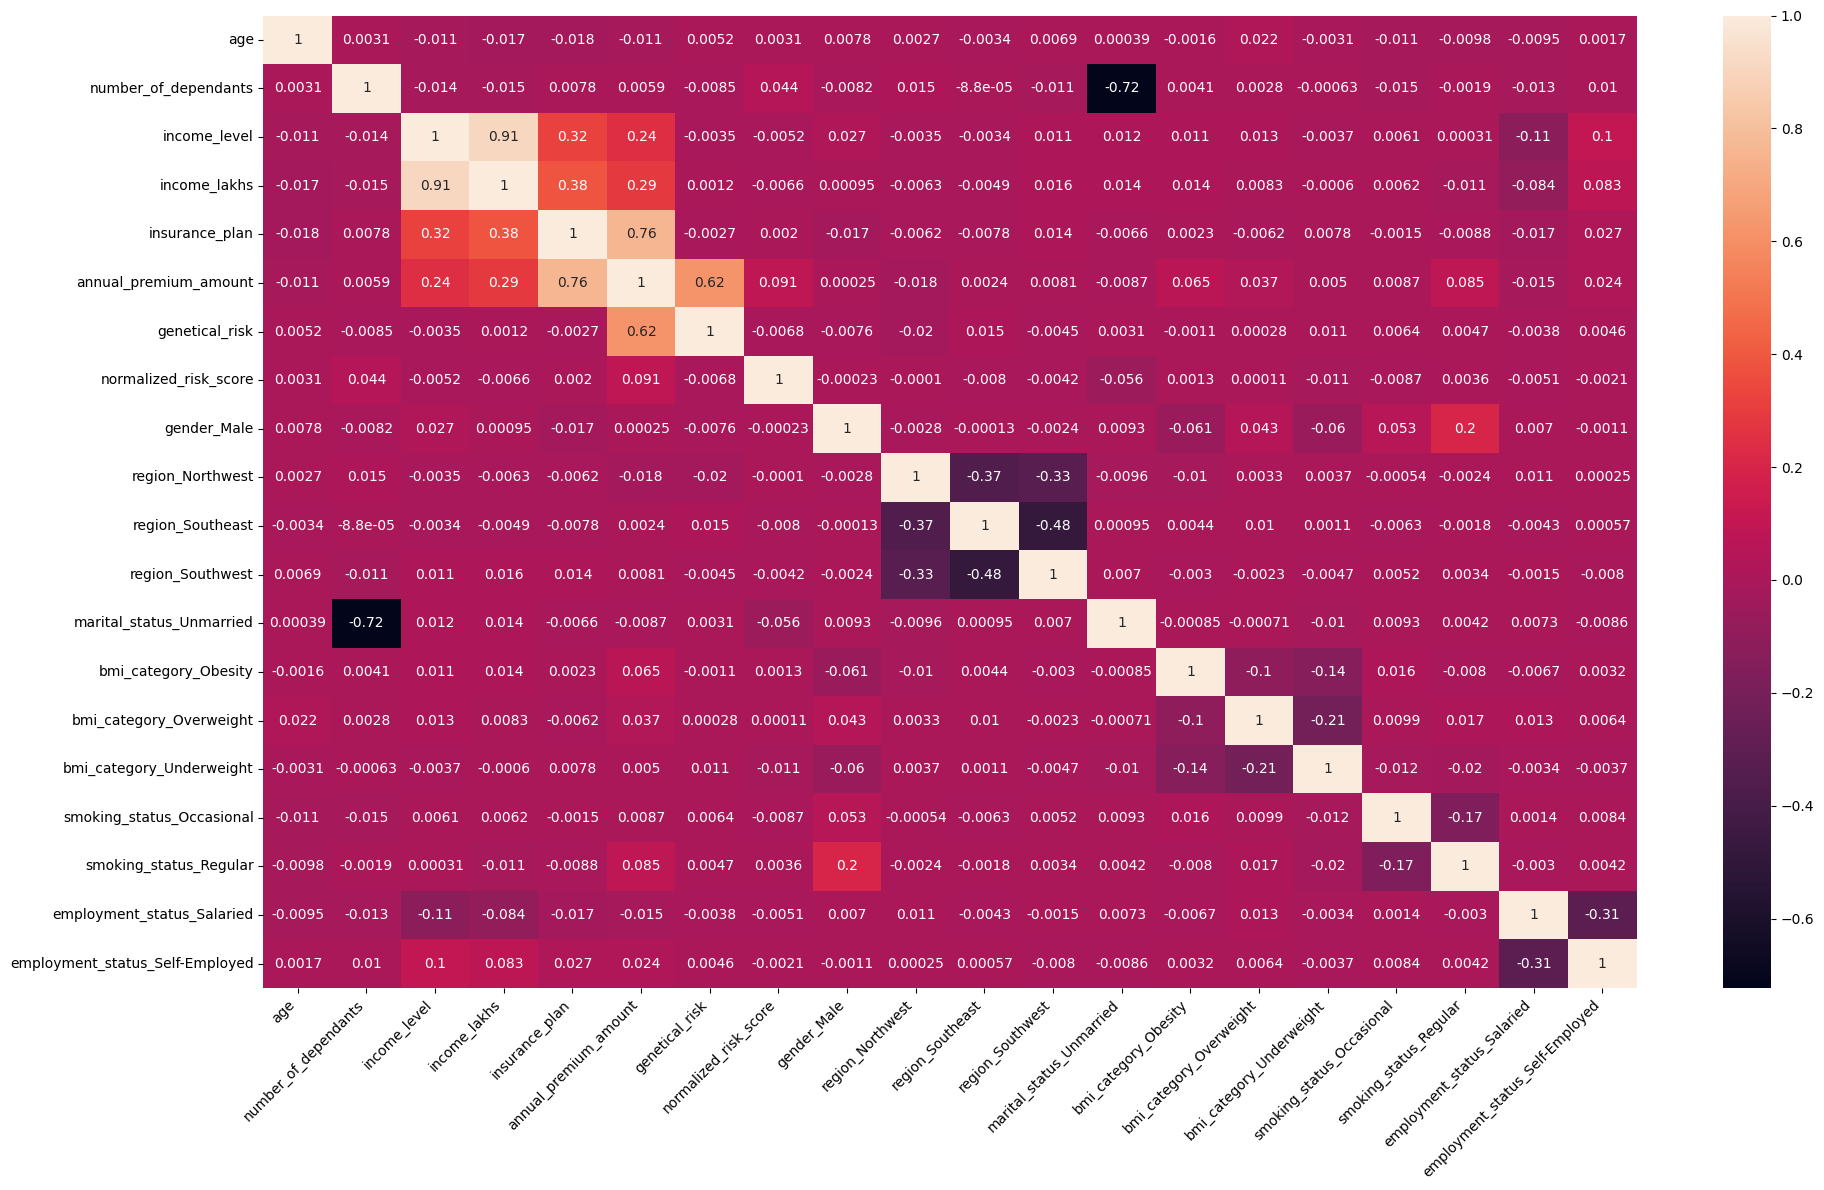

In [99]:
cm = df4.corr()

plt.figure(figsize= (20,12))
sns.heatmap(cm, annot=True)
plt.xticks(rotation = 45, ha = "right")
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()

In [100]:
X = df4.drop(["annual_premium_amount"], axis=1)
y = df4["annual_premium_amount"]

In [101]:
from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ["age", "number_of_dependants", "income_level", "income_lakhs", "insurance_plan", "genetical_risk"]
scaler = MinMaxScaler()

X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,0.499211,0.240914,0.357994,0.216064,0.179578,0.500777,0.092076,0.550383,0.201284,0.346958,0.304590,0.899881,0.063527,0.136513,0.222493,0.086379,0.223589,0.350045,0.149955
std,0.327750,0.312413,0.347481,0.219516,0.300051,0.342037,0.230016,0.497467,0.400970,0.476014,0.460245,0.300167,0.243914,0.343341,0.415931,0.280929,0.416660,0.476996,0.357036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.000000,0.000000,0.050505,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.571429,0.000000,0.333333,0.151515,0.000000,0.600000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.714286,0.333333,0.666667,0.303030,0.500000,0.800000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df["Column"] = data.columns
    vif_df["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_df

In [103]:
calculate_vif(X)

,Column,VIF
0,age,3.154599
1,number_of_dependants,1.930428
2,income_level,11.928708
3,income_lakhs,11.876413
4,insurance_plan,1.592966
5,genetical_risk,2.981159
6,normalized_risk_score,1.154501
7,gender_Male,2.311831
8,region_Northwest,2.154355
9,region_Southeast,2.990493


In [104]:
calculate_vif(X.drop(["income_level"], axis=1))

,Column,VIF
0,age,3.153255
1,number_of_dependants,1.927788
2,income_lakhs,2.294155
3,insurance_plan,1.587868
4,genetical_risk,2.981158
5,normalized_risk_score,1.154453
6,gender_Male,2.301658
7,region_Northwest,2.153423
8,region_Southeast,2.989301
9,region_Southwest,2.743932


In [105]:
X_reduced = X.drop(["income_level"], axis=1)
X_reduced.sample(5)

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
7585,0.571429,1.000000,0.070707,1.0,0.4,0.0,1,1,0,0,1,0,0,0,1,0,0,1
13592,0.857143,0.333333,0.060606,0.0,0.2,0.0,0,0,0,1,1,0,1,0,0,0,0,0
4233,0.000000,1.000000,0.030303,0.5,1.0,0.0,0,1,0,0,0,0,1,0,0,1,1,0
3483,0.428571,0.333333,0.373737,0.0,0.2,0.0,0,0,0,0,1,1,0,0,0,0,0,0
8681,0.000000,0.000000,0.101010,0.0,1.0,0.0,0,0,1,0,1,0,1,0,0,0,0,1


### Model Training

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size = 0.3, random_state = 10)

print(f"X train {X_train.shape}")
print(f"X test {X_test.shape}")
print(f"Y train {y_train.shape}")
print(f"Y test {y_test.shape}")

X train (14060, 18)
X test (6026, 18)
Y train (14060,)
Y test (6026,)


In [107]:
from sklearn.linear_model import LinearRegression

In [108]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
test_score = model_lr.score(X_test, y_test)
train_score = model_lr.score(X_train, y_train)
train_score, test_score

(0.988297900194864, 0.9887263253056615)

In [109]:
y_pred = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
print(f"Linear Regression ==> MSE: {mse_lr} RMSE: {rmse_lr}")

Linear Regression ==> MSE: 85732.34377930452 RMSE: 292.8008602776032


In [110]:
np.set_printoptions(suppress=True, precision=6)
model_lr.coef_

array([  -7.229032,   19.536182,   -1.264528, 7001.125261, 4996.988728,
       1109.148365,    8.177988,    1.677353,   -3.275327,    6.317095,
         16.068972,  812.844929,  400.375598,  107.529819,  205.069661,
        610.98328 ,    0.038784,   -5.242018])

In [111]:
model_lr.intercept_, model_lr.coef_

(3978.8235284382563,
 array([  -7.229032,   19.536182,   -1.264528, 7001.125261, 4996.988728,
        1109.148365,    8.177988,    1.677353,   -3.275327,    6.317095,
          16.068972,  812.844929,  400.375598,  107.529819,  205.069661,
         610.98328 ,    0.038784,   -5.242018]))

In [112]:
feature_importances = model_lr.coef_

coef_df = pd.DataFrame(feature_importances, index = X_test.columns, columns = ["Coefficients"])
coef_df = coef_df.sort_values(by = "Coefficients", ascending=True)
coef_df

,Coefficients
age,-7.229032
employment_status_Self-Employed,-5.242018
region_Southeast,-3.275327
income_lakhs,-1.264528
employment_status_Salaried,0.038784
region_Northwest,1.677353
region_Southwest,6.317095
gender_Male,8.177988
marital_status_Unmarried,16.068972
number_of_dependants,19.536182


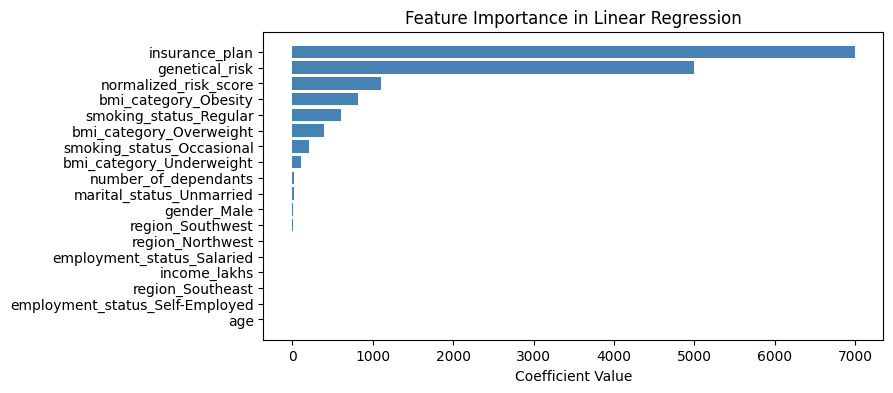

In [113]:
plt.figure(figsize= (8, 4))
plt.barh(coef_df.index, coef_df["Coefficients"], color="steelblue")
plt.xlabel("Coefficient Value")
plt.title("Feature Importance in Linear Regression")
plt.show()

In [114]:
model_rg = Ridge(alpha=20)
model_rg.fit(X_train, y_train)
train_score = model_rg.score(X_train, y_train)
test_score = model_rg.score(X_test, y_test)
train_score, test_score

(0.9880656506240506, 0.9885278004490808)

In [115]:
y_pred = model_rg.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
print("Ridge Regression ==> MSE: ", mse_lr, "RMSE: ", rmse_lr)

Ridge Regression ==> MSE:  87242.05571570263 RMSE:  295.36766193289105


In [116]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)
train_score = model_xgb.score(X_train, y_train)
test_score = model_xgb.score(X_test, y_test)
train_score, test_score

(0.9925054907798767, 0.987729549407959)

In [117]:
y_pred = model_xgb.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred)
rmse_xgb = np.sqrt(mse_xgb)
print(f"XGBoost Regression ==> MSE: {mse_xgb} RMSE: {rmse_xgb}")

XGBoost Regression ==> MSE: 93312.703125 RMSE: 305.47128036036383


In [118]:
best_model = model_lr

### Error Analysis

In [119]:
y_pred = best_model.predict(X_test)

residuals = y_pred - y_test
residuals_pct = residuals * 100 / y_test

result_df = pd.DataFrame({
    "actual": y_test,
    "predicted": y_pred,
    "diff": residuals,
    "diff_pct": residuals_pct
})

result_df.head()

,actual,predicted,diff,diff_pct
12774,6238,6121.456891,-116.543109,-1.868277
14758,9462,9601.797510,139.797510,1.477463
13205,5152,5611.056493,459.056493,8.910258
14278,6988,7423.486322,435.486322,6.231916
19351,4917,5112.056543,195.056543,3.966983


<Axes: xlabel='diff_pct', ylabel='Count'>

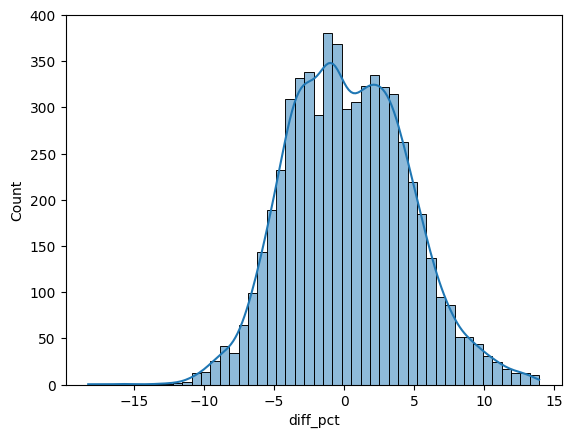

In [120]:
sns.histplot(result_df["diff_pct"], kde = True)

In [121]:
extreme_error_thresold = 10

extreme_result_df = result_df[np.abs(result_df["diff_pct"]) > extreme_error_thresold]

In [122]:
extreme_result_df.shape

(129, 4)

In [123]:
result_df.shape

(6026, 4)

In [124]:
extreme_error_pct = extreme_result_df.shape[0] * 100 / result_df.shape[0]
extreme_error_pct

2.140723531364089

In [125]:
result_df[np.abs(result_df["diff_pct"]) > 50].sort_values("diff_pct", ascending=False)

,actual,predicted,diff,diff_pct


In [126]:
X_test.index

Index([12774, 14758, 13205, 14278, 19351, 10622, 16391, 14799, 17184, 16348,
       ...
        8695,  9658, 14195,  1365,   399, 17652,  5807, 10298, 13316,  2583],
      dtype='int64', length=6026)

In [127]:
extreme_result_df.index

Index([12669,  2918, 17084,  7181, 12285, 13476, 15481,  2948,  4919, 15170,
       ...
       15166, 19580, 15664,  4204,  8692,  1986,  8008,  9714,  7357,  1534],
      dtype='int64', length=129)

In [128]:
extreme_error_df =  X_test.loc[extreme_result_df.index]
extreme_error_df.head()

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
12669,0.857143,0.000000,0.000000,0.0,0.0,0.0,1,0,1,0,1,0,1,0,0,0,1,0
2918,0.285714,0.000000,0.151515,0.0,0.2,0.0,1,1,0,0,1,0,0,0,0,0,1,0
17084,1.000000,0.000000,0.353535,0.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0
7181,0.571429,0.000000,0.161616,0.0,0.0,0.0,1,0,0,1,1,0,0,0,0,0,0,0
12285,0.428571,0.333333,0.232323,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0


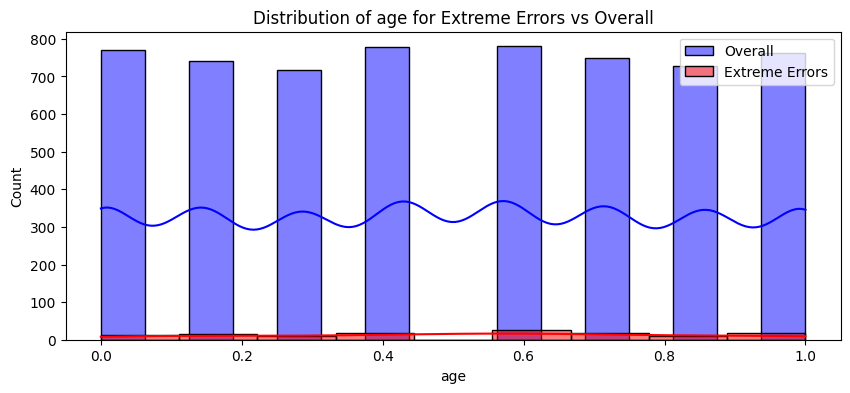

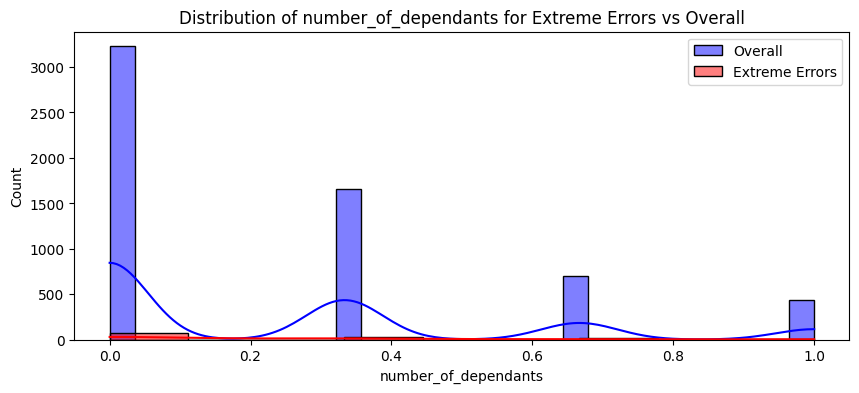

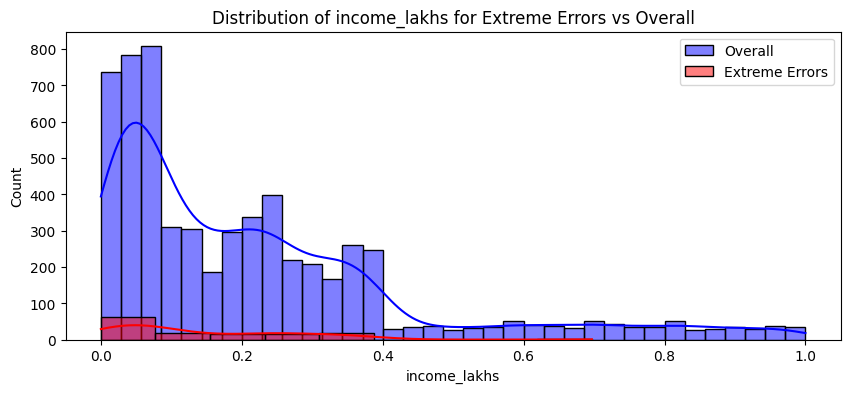

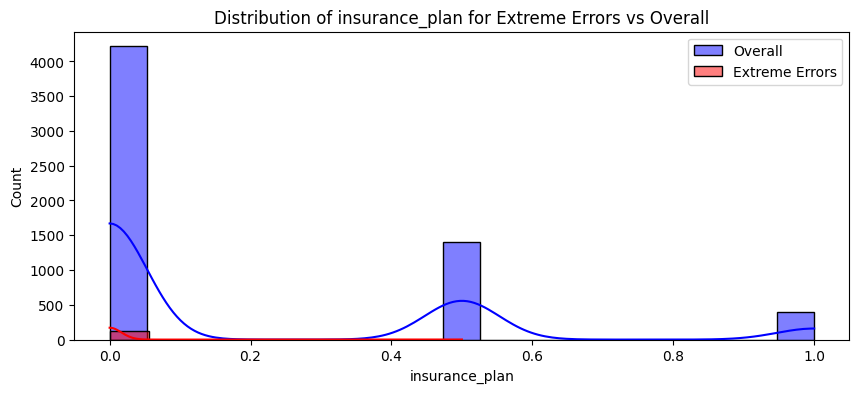

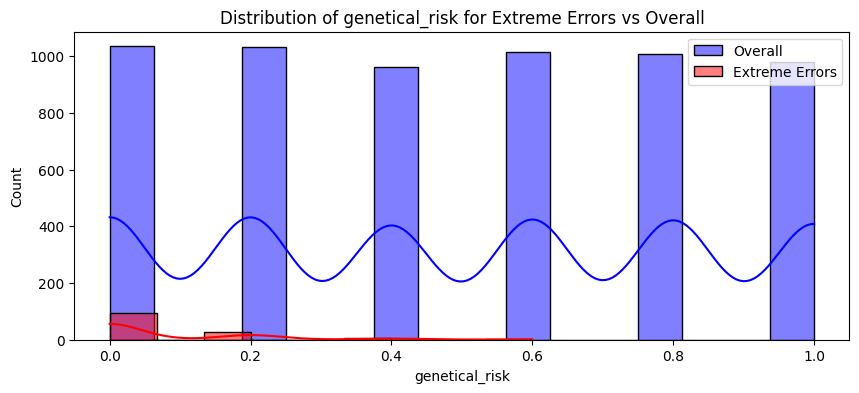

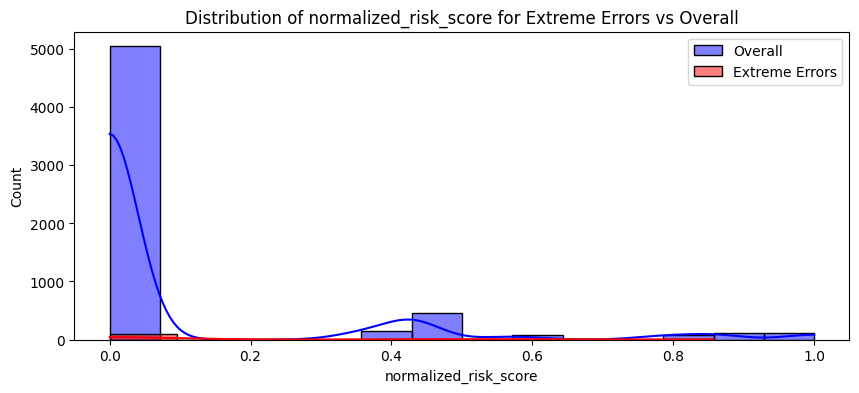

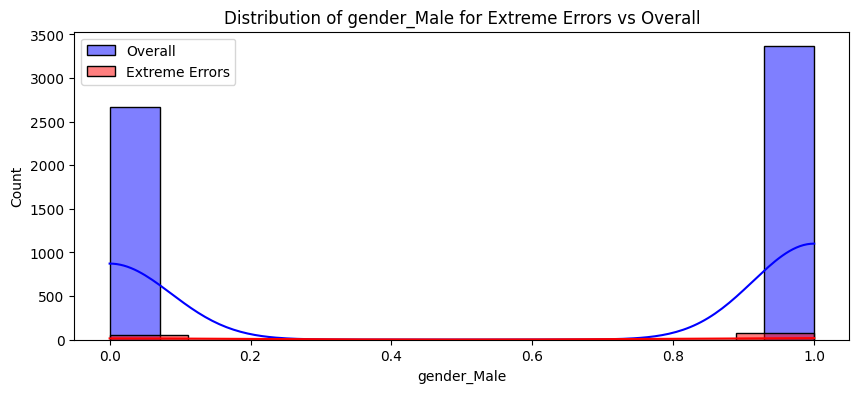

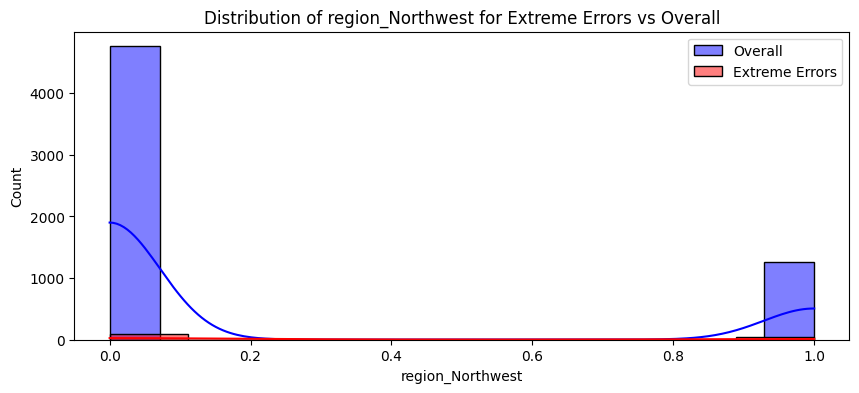

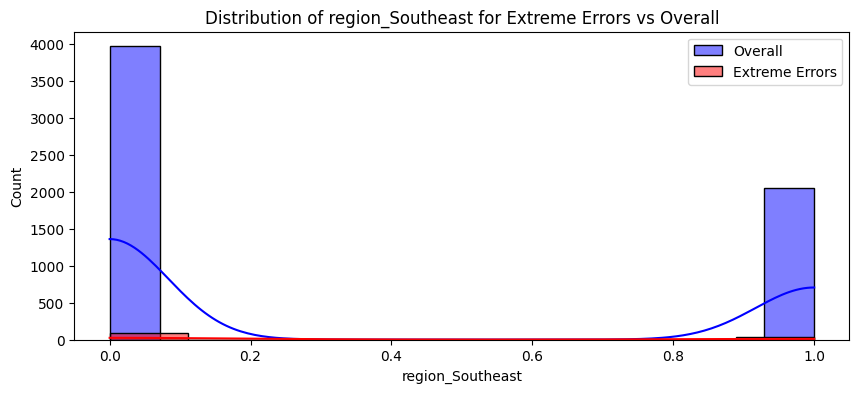

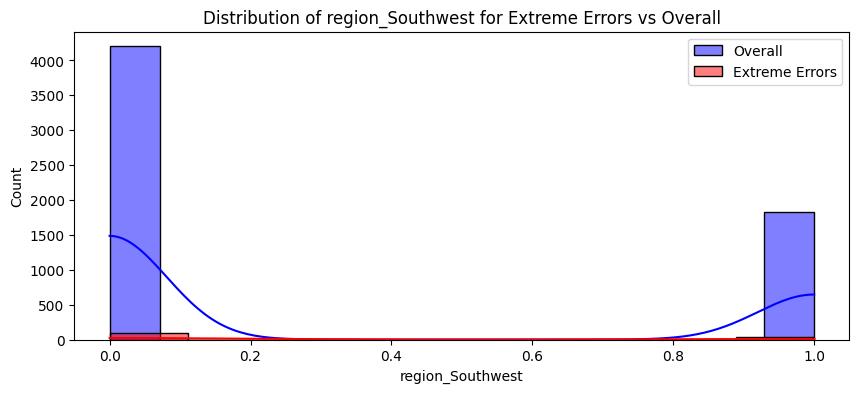

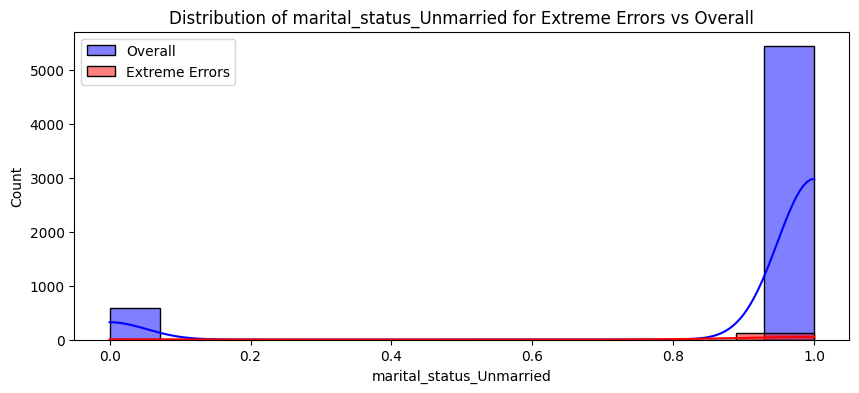

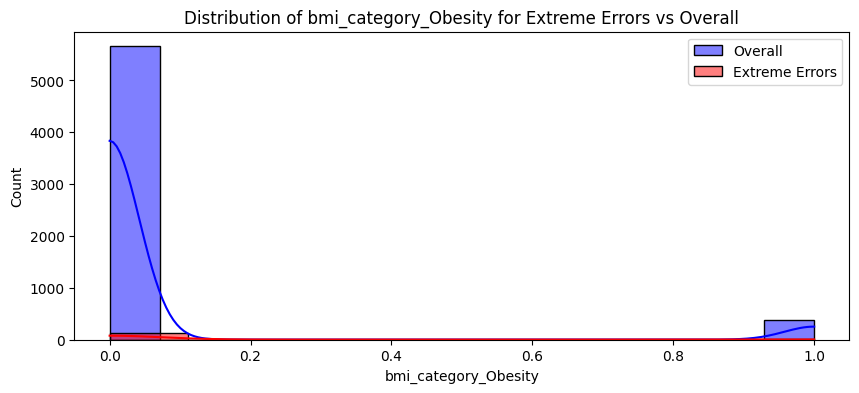

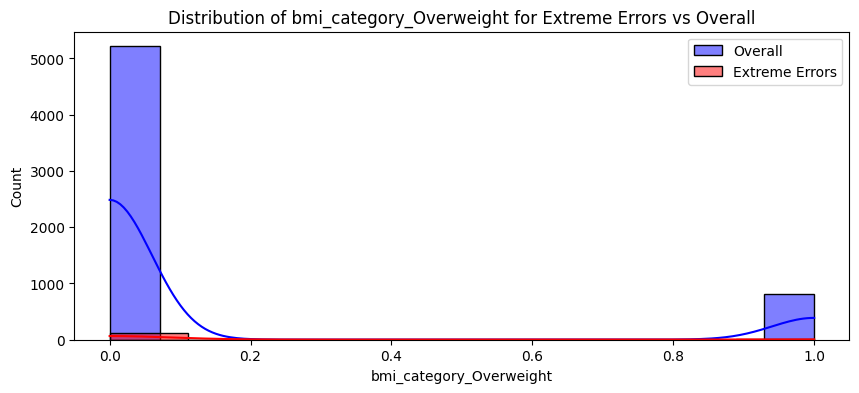

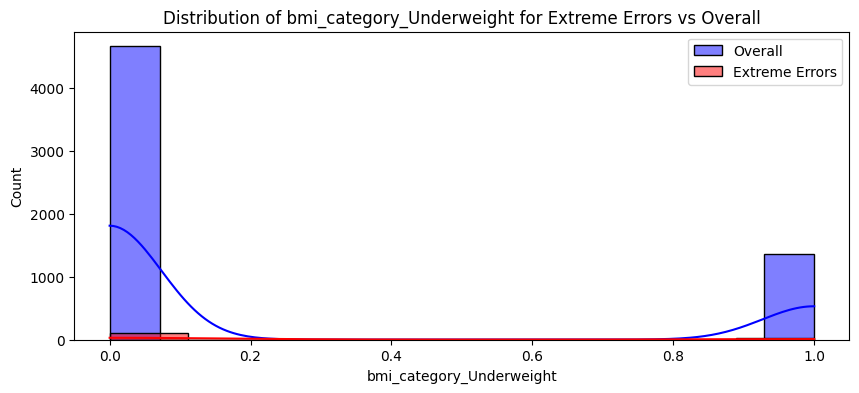

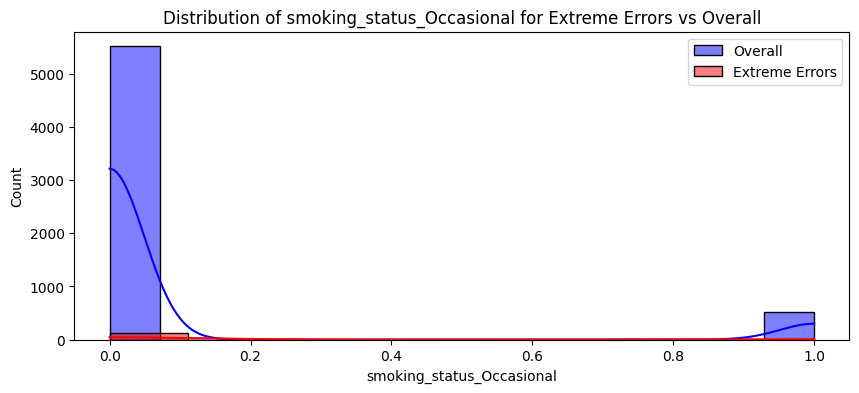

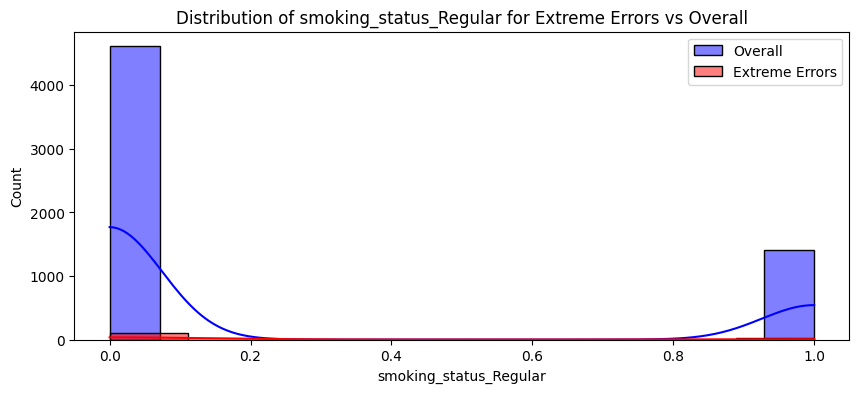

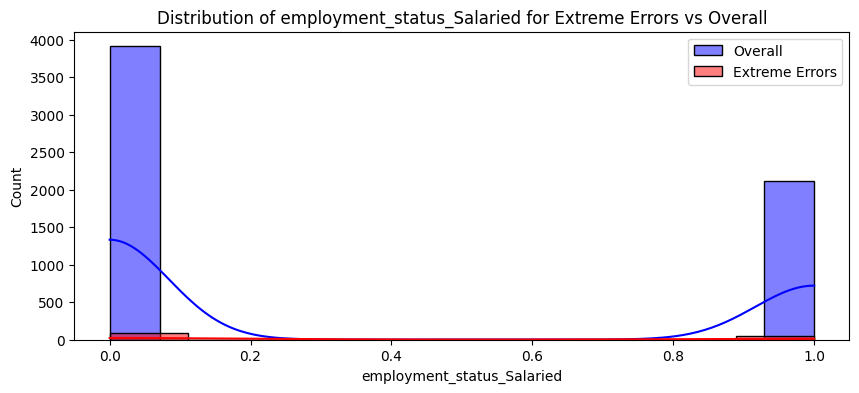

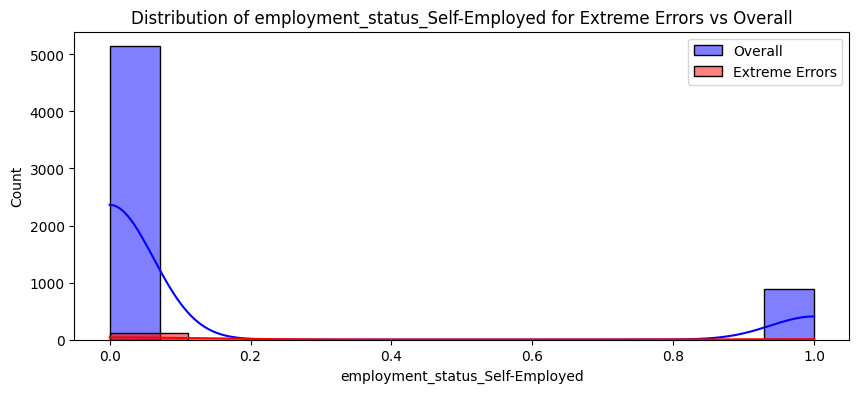

In [129]:
for feature in X_test.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(X_test[feature], color = "blue", alpha = 0.5, label="Overall", kde= True)
    sns.histplot(extreme_error_df[feature], color = "red", label="Extreme Errors", kde= True)
    plt.legend()
    plt.title(f"Distribution of {feature} for Extreme Errors vs Overall")
    plt.show()

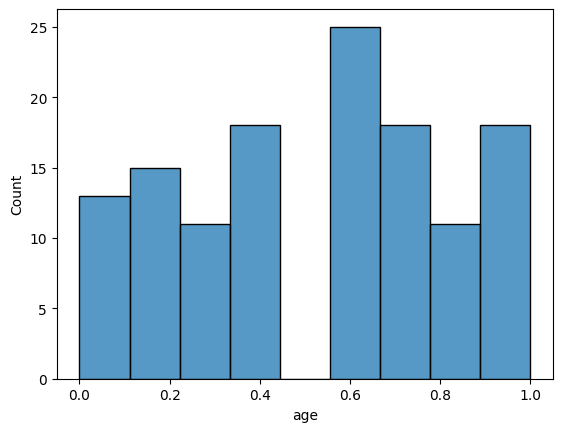

In [130]:
sns.histplot(extreme_error_df["age"])
plt.show()

In [131]:
extreme_error_df["income_level"] = -1

In [132]:
df_reversed = pd.DataFrame()
df_reversed[cols_to_scale] = scaler.inverse_transform(extreme_error_df[cols_to_scale])
df_reversed.sample(5)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk
38,19.0,3.0,-2.0,4.0,1.0,0.0
45,20.0,1.0,-2.0,8.0,1.0,0.0
93,25.0,2.0,-2.0,36.0,1.0,0.0
53,25.0,1.0,-2.0,25.0,1.0,0.0
89,19.0,0.0,-2.0,8.0,1.0,0.0


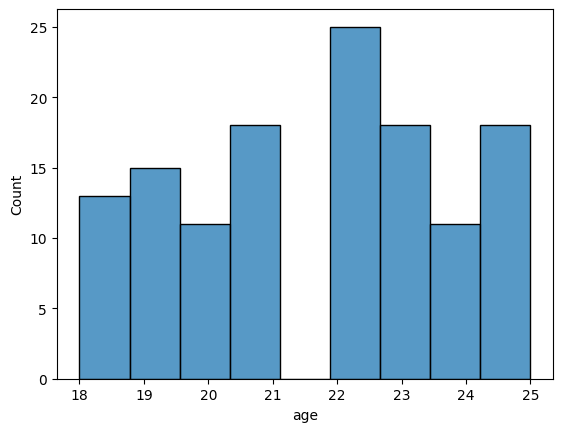

In [133]:
sns.histplot(df_reversed["age"])
plt.show()

In [134]:
df_reversed["age"].quantile(0.5)

22.0

In [135]:
df_reversed["age"].quantile(0.75)

23.0

In [136]:
df_reversed["age"].quantile(0.98)

25.0

### Export model to file

In [137]:
from joblib import dump

In [138]:
dump(best_model, "./artifacts/model_young.joblib")

['./artifacts/model_young.joblib']

In [139]:
scaler_with_cols = {
    "scaler": scaler,
    "cols_to_scale": cols_to_scale
}
scaler_with_cols

{'scaler': MinMaxScaler(),
 'cols_to_scale': ['age',
  'number_of_dependants',
  'income_level',
  'income_lakhs',
  'insurance_plan',
  'genetical_risk']}

In [140]:
dump(scaler_with_cols, "./artifacts/scaler_young.joblib")

['./artifacts/scaler_young.joblib']